## 2-1 결측치 처리

+ 0 등 상수로 대치
+ 대푯값으로 대치
+ 단순확률대치법
+ 시계열 데이터의 경우 보간법
+ 결측치가 극소수이거나 대다수인 경우, 데이터의 행이나 열을 삭제

결측치 확인

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action = 'ignore')

wine = pd.read_csv('./data/2-1_wine.csv', index_col= 0)
wine = wine[['Alcohol', 'Malicacid', 'Ash', 'Magnesium', 'Hue']]
wine.head()

,Alcohol,Malicacid,Ash,Magnesium,Hue
0,14.23,1.71,2.43,127,1.04
1,13.20,1.78,2.14,100,1.05
2,13.16,2.36,2.67,101,1.03
3,14.37,1.95,2.50,113,0.86
4,13.24,2.59,2.87,118,1.04


In [6]:
wine.isnull().sum()

Alcohol      0
Malicacid    0
Ash          0
Magnesium    0
Hue          0
dtype: int64

In [16]:
# 결측치가 없어 임의로 결측치 입력
from numpy.random import randint
wine_m = wine.copy()

for col in ['Ash', 'Alcohol']:
    random_idx = randint(0, len(wine), 25)
    wine_m.loc[random_idx, col] = np.nan

wine_m.isnull().sum()

Alcohol      23
Malicacid     0
Ash          22
Magnesium     0
Hue           0
dtype: int64

In [ ]:
# !pip install missingno

c:\Users\USER\anaconda3\lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


Text(0, 0.5, '결측치 생성 데이터')

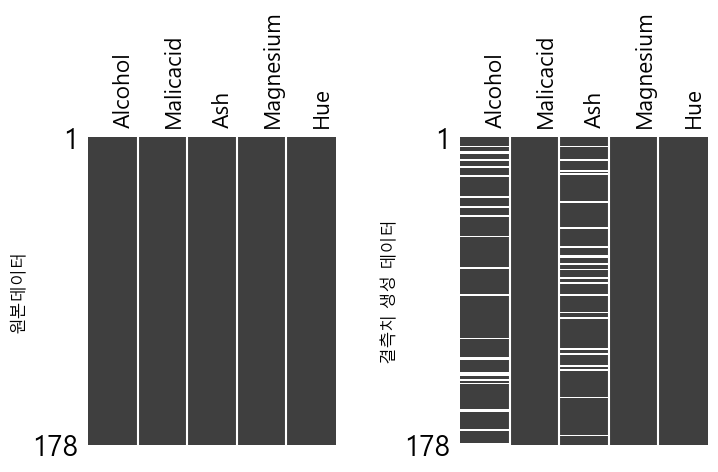

In [30]:
# plotting 환경 설정
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,5) # 그래프 크기
plt.rcParams['font.family'] = 'Malgun Gothic' # 글꼴
plt.rcParams['font.size'] = 12 # 글꼴 크기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 표기

fig, ax = plt.subplots(1,2,figsize = (8,4))
plt.subplots_adjust(wspace= 0.5)

import missingno as msno
msno.matrix(df = wine, figsize = (5,5), ax = ax[0], label_rotation= 90)
ax[0].set_ylabel('원본데이터')

msno.matrix(df = wine_m, figsize = (5,5), ax = ax[1], label_rotation= 90)
ax[1].set_ylabel('결측치 생성 데이터')

0 으로 대치 & 상수로 대치

In [32]:
# 대치 전 : wine_m
wine_m[['Alcohol', 'Ash']].head(10)

,Alcohol,Ash
0,14.23,2.43
1,13.20,2.14
2,13.16,2.67
3,14.37,2.50
4,13.24,2.87
5,NaN,NaN
6,14.39,2.45
7,14.06,2.61
8,NaN,2.17
9,NaN,2.27


In [35]:
# 0으로 대치
wine_imp = wine_m[['Alcohol', 'Ash']].fillna(0)
wine_imp[['Alcohol', 'Ash']].head(10)

,Alcohol,Ash
0,14.23,2.43
1,13.20,2.14
2,13.16,2.67
3,14.37,2.50
4,13.24,2.87
5,0.00,0.00
6,14.39,2.45
7,14.06,2.61
8,0.00,2.17
9,0.00,2.27


In [36]:
# 100으로 대치
wine_imp = wine_m[['Alcohol', 'Ash']].fillna(100)
wine_imp[['Alcohol', 'Ash']].head(10)

,Alcohol,Ash
0,14.23,2.43
1,13.20,2.14
2,13.16,2.67
3,14.37,2.50
4,13.24,2.87
5,100.00,100.00
6,14.39,2.45
7,14.06,2.61
8,100.00,2.17
9,100.00,2.27


대푯값으로 채우는 방법
> 평균값, 중앙값, 최빈값 등

In [37]:
# 대표값으로 채우기 전
wine_m[['Alcohol', 'Ash']].head(10)

,Alcohol,Ash
0,14.23,2.43
1,13.20,2.14
2,13.16,2.67
3,14.37,2.50
4,13.24,2.87
5,NaN,NaN
6,14.39,2.45
7,14.06,2.61
8,NaN,2.17
9,NaN,2.27


In [46]:
# 결측치를 대푯값 mean 으로 대치한 데이터
# wine_imp1 = wine_m[['Alcohol', 'Ash']].fillna(wine_m[['Alcohol', 'Ash']].mean)
wine_m[['Alcohol', 'Ash']].fillna(wine_m[['Alcohol', 'Ash']].mean()).head(10) # mean, median

,Alcohol,Ash
0,14.230000,2.430000
1,13.200000,2.140000
2,13.160000,2.670000
3,14.370000,2.500000
4,13.240000,2.870000
5,12.962387,2.371218
6,14.390000,2.450000
7,14.060000,2.610000
8,12.962387,2.170000
9,12.962387,2.270000


In [63]:
wine_m['Alcohol'].value_counts(ascending= False).index

Index([13.05, 12.37, 12.08, 12.29, 12.42, 13.88,  12.6, 14.22,  13.5, 13.49,
       ...
       13.86, 12.21, 13.34, 12.17, 13.67, 12.64, 13.72, 13.56, 13.74, 13.27],
      dtype='float64', name='Alcohol', length=113)

In [66]:
# 최빈값으로 바꾸기
# value_counts(ascending = False)로 내림차순 정렬하고 제일 큰 것으로 대치
wine_m['Alcohol'].fillna(wine_m['Alcohol'].value_counts(ascending= False).index[0]).head(10)
wine_m['Ash'].fillna(wine_m['Ash'].value_counts(ascending= False).index[0]).head(10)

0    2.43
1    2.14
2    2.67
3    2.50
4    2.87
5    2.30
6    2.45
7    2.61
8    2.17
9    2.27
Name: Ash, dtype: float64

단순확률대치법
- 유사한 데이터 셋에서 랜덤하게 샘플링한 값으로 대치하는 방법
- 다른 데이터셋을 사용하므로 ADP 에는 사용하지 않을듯?


다른 변수들로 모델링하여 결측값을 예측하는 방법

In [79]:
# KNNImputer로 결측치를 대치
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
wine_imp3 = imputer.fit_transform(wine_m)
wine_imp3 = pd.DataFrame(wine_imp3, columns= wine_m.columns)
wine_imp3.head(10)

,Alcohol,Malicacid,Ash,Magnesium,Hue
0,14.230000,1.71,2.43,127.0,1.04
1,13.200000,1.78,2.14,100.0,1.05
2,13.160000,2.36,2.67,101.0,1.03
3,14.370000,1.95,2.50,113.0,0.86
4,13.240000,2.59,2.87,118.0,1.04
5,13.940000,1.76,2.56,112.0,1.05
6,14.390000,1.87,2.45,96.0,1.02
7,14.060000,2.15,2.61,121.0,1.06
8,13.056667,1.64,2.17,97.0,1.08
9,12.830000,1.35,2.27,98.0,1.01


In [80]:
wine_imp3.isnull().sum()

Alcohol      0
Malicacid    0
Ash          0
Magnesium    0
Hue          0
dtype: int64

보간법
> 선형보간법, 다항식보간법, 스플라인보간법

In [92]:
# 선형보간법으로 결측치를 대치
# zero, slinear, quadratic, cubic 0,1,2,3차
wine_imp4 = wine_m.interpolate(method = 'linear') 
wine_imp4.head(10)

,Alcohol,Malicacid,Ash,Magnesium,Hue
0,14.230000,1.71,2.43,127,1.04
1,13.200000,1.78,2.14,100,1.05
2,13.160000,2.36,2.67,101,1.03
3,14.370000,1.95,2.50,113,0.86
4,13.240000,2.59,2.87,118,1.04
5,13.815000,1.76,2.66,112,1.05
6,14.390000,1.87,2.45,96,1.02
7,14.060000,2.15,2.61,121,1.06
8,14.073333,1.64,2.17,97,1.08
9,14.086667,1.35,2.27,98,1.01


In [84]:
wine_imp4.isnull().sum()

Alcohol      0
Malicacid    0
Ash          0
Magnesium    0
Hue          0
dtype: int64

## 2-2 이상치 처리

1. ESD(Extreme studentized deviation)
    + 평균 - 3*표준편차 < normal data < 평균 + 3*표준편차
2. 기하평균 - 2.5*표준편차 < normal data < 기하평균 + 2.5*표준편차
3. Q1 - 1.5*IQR < normal data < Q3 + 1.5*IQR
4. 군집 분석을 통한 이상치 진단 : DBSCAN 군집 분석을 통해 -1로 분류되는 값을 이상치로 진단

In [16]:
wine = pd.read_csv('./data/2-1_wine.csv', index_col = 0)
wine = wine[['Alcohol','Malicacid', 'Ash', 'Magnesium', 'Hue']]
wine.head()

,Alcohol,Malicacid,Ash,Magnesium,Hue
0,14.23,1.71,2.43,127,1.04
1,13.20,1.78,2.14,100,1.05
2,13.16,2.36,2.67,101,1.03
3,14.37,1.95,2.50,113,0.86
4,13.24,2.59,2.87,118,1.04


In [17]:
# Malicacid 변수 이상치 찾기
IQR = wine.Malicacid.quantile(0.75) - wine.Malicacid.quantile(0.25)
top = wine.Malicacid.quantile(0.75) + IQR * 1.5
bottom = wine.Malicacid.quantile(0.25) - IQR * 1.5

# 상한보다 크고 하한보다 작은 데이터 찾기
out_id = wine[(wine.Malicacid >= top) | (wine.Malicacid <= bottom)].index
out_id

Index([123, 137, 173], dtype='int64')

절단

In [4]:
prep_df = wine[['Malicacid']].drop(out_id, axis = 0)

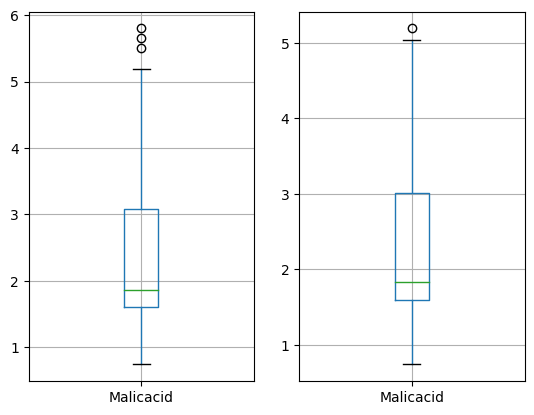

In [7]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2)
for data, ax in zip([wine[['Malicacid']], prep_df], axes):
    data.boxplot(ax = ax)

plt.show()

조정
+ 이상치를 상한과 하한값으로 보정

In [14]:
prep_df2 = wine[['Malicacid']].clip(bottom, top) # clip(min, max) 상한, 하한의 밖의 값을 상한과 하한으로 대치

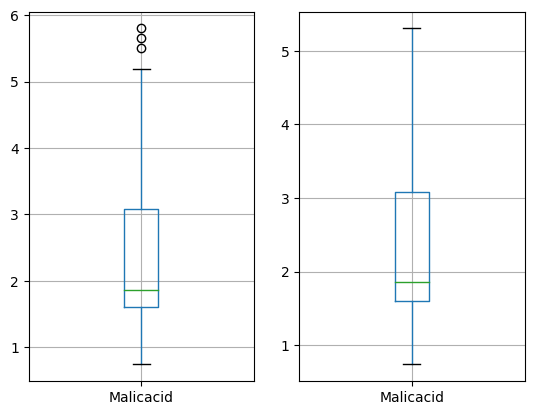

In [13]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2)
for data, ax in zip([wine[['Malicacid']], prep_df2], axes):
    data.boxplot(ax = ax)

plt.show()

클리핑
+ 이상치의 상한과 하한을 특정값으로 지정해서 해당값으로 조정
+ 이상치에 대한 확실한 정보를 가지고 있을 때

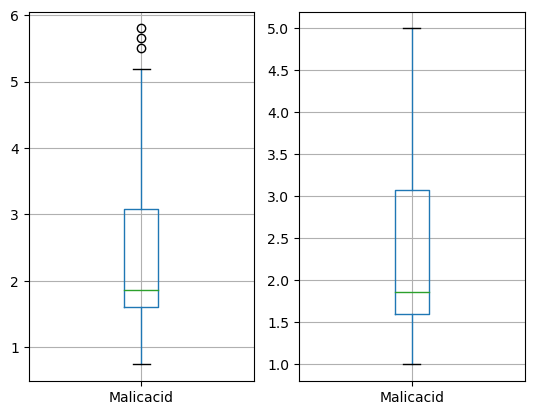

In [15]:
# 클리핑
prep_df3 = wine[['Malicacid']].clip(1, 5)

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2)
for data, ax in zip([wine[['Malicacid']], prep_df3], axes):
    data.boxplot(ax = ax)

plt.show()

## 2-3 클래스 불균형 처리
+ 오버샘플링 : RandomOverSampler, SMOTE 등
+ 언더샘플링 : RandomUnderSampler 등

실제 데이터들은 클래스가 불균형한 경향이 있는데, 소수 클래스의 데이터 수가 부족한 경우가 많으므로 주로 오버샘플링을 실시함

In [40]:
# 클래스 분균형 데이터 생성
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from collections import Counter

data = load_breast_cancer()
df = pd.DataFrame(np.c_[data.data, data.target], columns = list(data.feature_names) + ['target'])

# 3개의 feature와 target 추출
df = df[['mean radius', 'mean texture', 'mean area', 'target']]
print(df.head(3))
print('original data class 분포 \n', df.target.value_counts())

# 클래스 불균형한 imb_df 생성
df1 = df[df.target == 0].sample(50)
df2 = df[df.target == 1].sample(250)

imb_df = pd.concat([df1, df2]).reset_index(drop = True)
print('imbalanced data class 분포 \n',imb_df.target.value_counts())

features = imb_df.drop('target', axis = 1)
target = imb_df.target

   mean radius  mean texture  mean area  target
0        17.99         10.38     1001.0     0.0
1        20.57         17.77     1326.0     0.0
2        19.69         21.25     1203.0     0.0
original data class 분포 
 target
1.0    357
0.0    212
Name: count, dtype: int64
imbalanced data class 분포 
 target
1.0    250
0.0     50
Name: count, dtype: int64


랜덤오버샘플링
+ 소수 클래스를 단순 복제하여 균형을 맞춰주는 것
+ 동일한 데이터의 개수가 늘어난 것으로 과적합의 위험이 있음

imbalance data class 분포 
 target
1.0    250
0.0     50
Name: count, dtype: int64
oversampled data class 분포 
 target
0.0    250
1.0    250
Name: count, dtype: int64


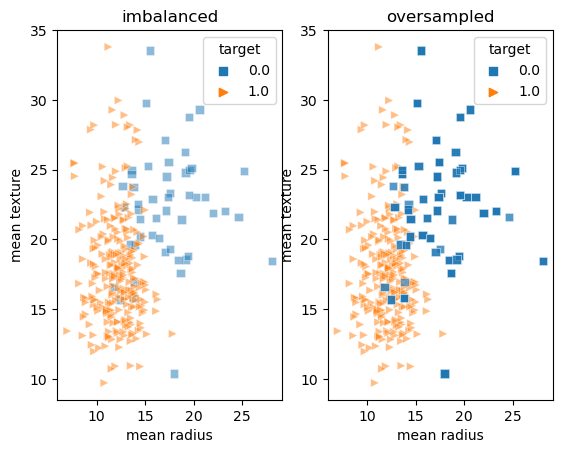

In [66]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(random_state=0)
bal_features, bal_target = os.fit_resample(features, target)
print('imbalance data class 분포 \n', target.value_counts())
print('oversampled data class 분포 \n', bal_target.value_counts())

import seaborn as sns
over_df1 = pd.DataFrame(np.c_[bal_features, bal_target], columns = imb_df.columns)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
sns.scatterplot(x = 'mean radius', y = 'mean texture', hue='target', data = imb_df, ax = ax[0],
                alpha = 0.5, style = 'target', markers= ['s', '>'])
ax[0].set_title('imbalanced')

sns.scatterplot(x = 'mean radius', y = 'mean texture', hue='target', data = over_df1, ax = ax[1],
                alpha = 0.5, style = 'target', markers= ['s', '>'])
ax[1].set_title('oversampled')
plt.show()

SMOTE
+ 임의의 소수 클래스 데이터로 부터 인근 소수 클래스 사이에 새로운 데이터를 생성

imbalance data class 분포 
 target
1.0    250
0.0     50
Name: count, dtype: int64
oversampled data class 분포 
 target
0.0    250
1.0    250
Name: count, dtype: int64


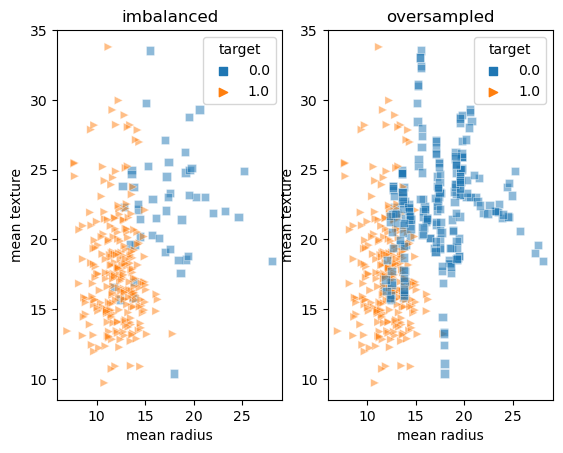

In [68]:
from imblearn.over_sampling import SMOTE
os = SMOTE(k_neighbors= 3, random_state= 0)
bal_features, bal_target = os.fit_resample(features, target)
print('imbalance data class 분포 \n', target.value_counts())
print('oversampled data class 분포 \n', bal_target.value_counts())

import seaborn as sns
over_df2 = pd.DataFrame(np.c_[bal_features, bal_target], columns = imb_df.columns)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
sns.scatterplot(x = 'mean radius', y = 'mean texture', hue='target', data = imb_df, ax = ax[0],
                alpha = 0.5, style = 'target', markers= ['s', '>'])
ax[0].set_title('imbalanced')

sns.scatterplot(x = 'mean radius', y = 'mean texture', hue='target', data = over_df2, ax = ax[1],
                alpha = 0.5, style = 'target', markers= ['s', '>'])
ax[1].set_title('oversampled')
plt.show()

> 같은 방식으로 BorderlineSMOTE, KMeansSMOTE, SVMSMOTE, ADASYN 의 SMOTE 오버샘플링 방법이 있음

imbalance data class 분포 
 target
1.0    250
0.0     50
Name: count, dtype: int64
oversampled data class 분포 
 target
0.0    252
1.0    250
Name: count, dtype: int64


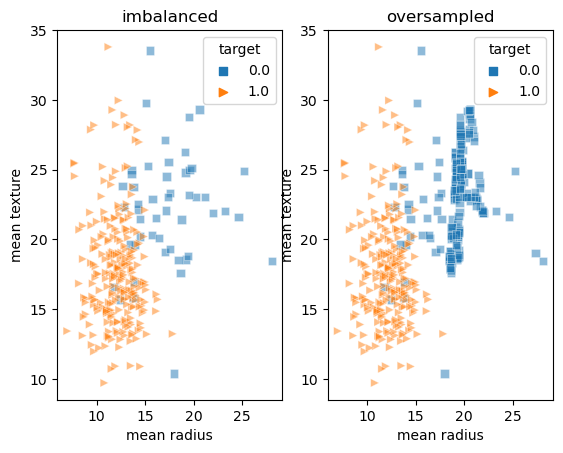

In [75]:
from imblearn.over_sampling import KMeansSMOTE
os = KMeansSMOTE(k_neighbors= 3, random_state= 0)
bal_features, bal_target = os.fit_resample(features, target)
print('imbalance data class 분포 \n', target.value_counts())
print('oversampled data class 분포 \n', bal_target.value_counts())

import seaborn as sns
over_df3 = pd.DataFrame(np.c_[bal_features, bal_target], columns = imb_df.columns)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
sns.scatterplot(x = 'mean radius', y = 'mean texture', hue='target', data = imb_df, ax = ax[0],
                alpha = 0.5, style = 'target', markers= ['s', '>'])
ax[0].set_title('imbalanced')

sns.scatterplot(x = 'mean radius', y = 'mean texture', hue='target', data = over_df3, ax = ax[1],
                alpha = 0.5, style = 'target', markers= ['s', '>'])
ax[1].set_title('oversampled')
plt.show()

오버샘플링된 데이터로 분류 학습 및 결과 비교

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score

data = [imb_df, over_df1, over_df2, over_df3]
data_title = ['no oversampled', 'RandomOverSampler', 'SMOTE', 'KMeansSMOTE']

scores = pd.DataFrame(index = ['train acc', 'test acc', 'f1 score', 'roc_auc score'], columns = data_title)

for df, title in zip(data, data_title):
    X = df.drop('target', axis = 1)
    y = df.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    scores.loc['train acc', title] = lr.score(X_train, y_train)
    scores.loc['test acc', title] = lr.score(X_test, y_test)
    scores.loc['f1 score', title] = f1_score(y_test, y_pred)
    scores.loc['roc_auc score', title] = roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])

scores
# KMeansSMOTE 가 가장 좋다

,no oversampled,RandomOverSampler,SMOTE,KMeansSMOTE
train acc,0.937778,0.906667,0.874667,0.957447
test acc,0.92,0.904,0.848,0.97619
f1 score,0.951613,0.892857,0.837607,0.97479
roc_auc score,0.961538,0.959572,0.945749,0.998482


## 2-4 변수변환

+ 신경망 모델, 거리기반 모델 : 반드시 스케일링이 필요
+ 트리 기반 모델 : 스케일링이 필수는 아님

### 2.4.1 수치형 변수변환

- 선형변환 : MinMaxScaling, StandardScaling, Robust Scaling, Quantile Scaling
- 비선형변환 : 로그변환, Box-cox, Yeo-Johnson 등

In [6]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")

diabetes = pd.read_csv('./data/2-4_diabetes.csv')
diabetes.head()

X = diabetes[['Pregnancies', 'BloodPressure', 'BMI', 'Age']]
y = diabetes['Outcome']

표준화

In [32]:
print(X.describe())

# sklearn의 StandardScaler -> 평균을 0, 표준편차를 1로 만드는 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_ss = scaler.fit_transform(X)
X_ss = pd.DataFrame(X_ss, columns = X.columns)

print(X_ss.describe())

       Pregnancies  BloodPressure         BMI         Age
count   768.000000     768.000000  768.000000  768.000000
mean      3.845052      69.105469   31.992578   33.240885
std       3.369578      19.355807    7.884160   11.760232
min       0.000000       0.000000    0.000000   21.000000
25%       1.000000      62.000000   27.300000   24.000000
50%       3.000000      72.000000   32.000000   29.000000
75%       6.000000      80.000000   36.600000   41.000000
max      17.000000     122.000000   67.100000   81.000000
        Pregnancies  BloodPressure           BMI           Age
count  7.680000e+02   7.680000e+02  7.680000e+02  7.680000e+02
mean  -6.476301e-17   1.503427e-17  2.590520e-16  1.931325e-16
std    1.000652e+00   1.000652e+00  1.000652e+00  1.000652e+00
min   -1.141852e+00  -3.572597e+00 -4.060474e+00 -1.041549e+00
25%   -8.448851e-01  -3.673367e-01 -5.955785e-01 -7.862862e-01
50%   -2.509521e-01   1.496408e-01  9.419788e-04 -3.608474e-01
75%    6.399473e-01   5.632228e-01  5

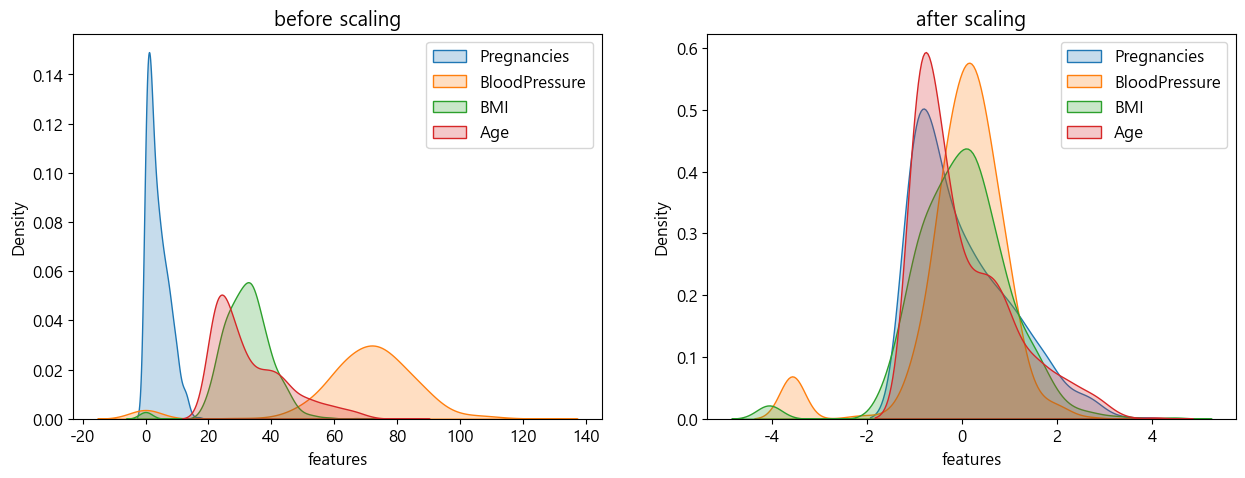

In [34]:
# scaling 전후 데이터 분포 비교 시각화
import seaborn as sns
import matplotlib.pyplot as plt
# plotting 환경 설정
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,5) # 그래프 크기
plt.rcParams['font.family'] = 'Malgun Gothic' # 글꼴
plt.rcParams['font.size'] = 12 # 글꼴 크기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 표기

fig, ax = plt.subplots(1,2, figsize = (15,5))
for col in X.columns:
    sns.kdeplot(X[col], legend = True, ax = ax[0], shade = True)
    sns.kdeplot(X_ss[col], legend = True, ax = ax[1], shade = True)

ax[0].legend(X.columns)
ax[0].set_title('before scaling')
ax[0].set_xlabel('features')

ax[1].legend(X_ss.columns)
ax[1].set_title('after scaling')
ax[1].set_xlabel('features')
plt.show()

최대최소 스케일링

       Pregnancies  BloodPressure         BMI         Age
count   768.000000     768.000000  768.000000  768.000000
mean      0.226180       0.566438    0.476790    0.204015
std       0.198210       0.158654    0.117499    0.196004
min       0.000000       0.000000    0.000000    0.000000
25%       0.058824       0.508197    0.406855    0.050000
50%       0.176471       0.590164    0.476900    0.133333
75%       0.352941       0.655738    0.545455    0.333333
max       1.000000       1.000000    1.000000    1.000000


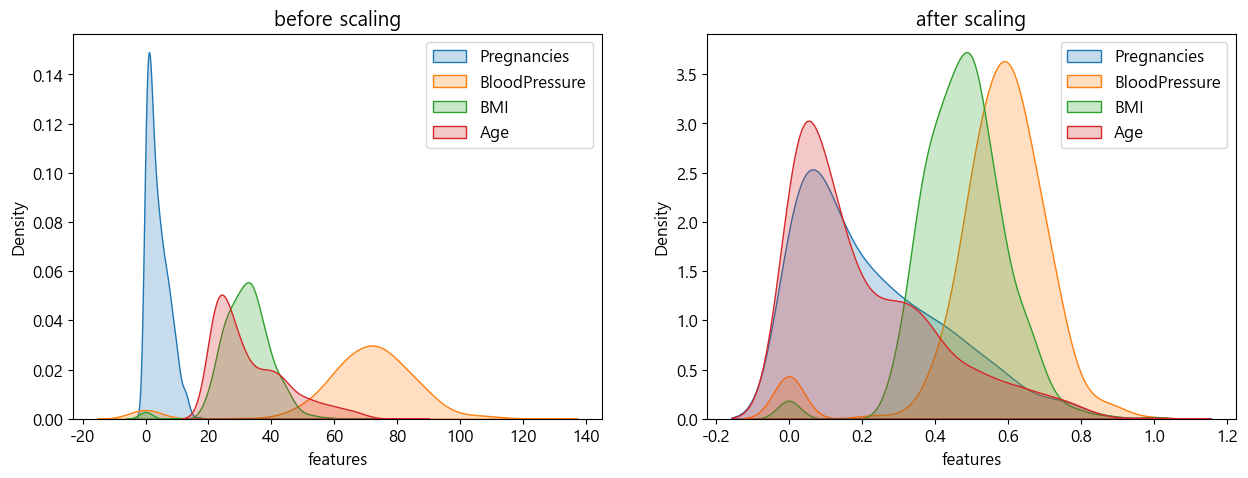

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_mm = scaler.fit_transform(X)
X_mm = pd.DataFrame(X_mm, columns = X.columns)
print(X_mm.describe())

fig, ax = plt.subplots(1,2,figsize = (15,5))
for col in X.columns:
    sns.kdeplot(X[col], ax = ax[0], shade = True)
    sns.kdeplot(X_mm[col], ax = ax[1], shade = True)

ax[0].legend(X.columns)
ax[0].set_title('before scaling')
ax[0].set_xlabel('features')

ax[1].legend(X_mm.columns)
ax[1].set_title('after scaling')
ax[1].set_xlabel('features')
plt.show()

Robust scaling

       Pregnancies  BloodPressure         BMI         Age
count   768.000000     768.000000  768.000000  768.000000
mean      0.169010      -0.160807   -0.000798    0.249464
std       0.673916       1.075323    0.847759    0.691778
min      -0.600000      -4.000000   -3.440860   -0.470588
25%      -0.400000      -0.555556   -0.505376   -0.294118
50%       0.000000       0.000000    0.000000    0.000000
75%       0.600000       0.444444    0.494624    0.705882
max       2.800000       2.777778    3.774194    3.058824


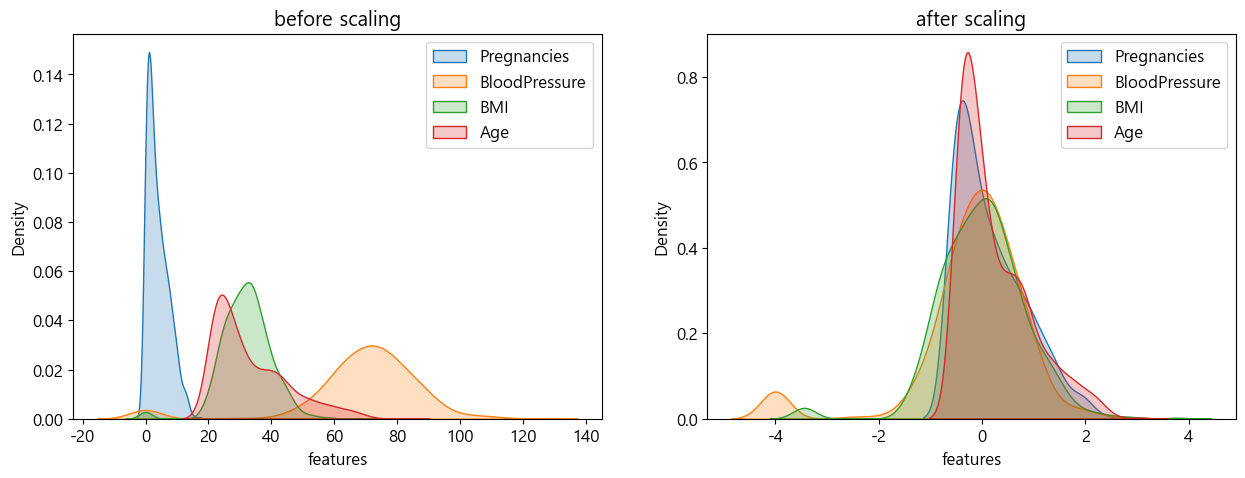

In [36]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_rs = scaler.fit_transform(X)
X_rs = pd.DataFrame(X_rs, columns = X.columns)
print(X_rs.describe())

fig, ax = plt.subplots(1,2,figsize = (15,5))
for col in X.columns:
    sns.kdeplot(X[col], ax = ax[0], shade = True)
    sns.kdeplot(X_rs[col], ax = ax[1], shade = True)

ax[0].legend(X.columns)
ax[0].set_title('before scaling')
ax[0].set_xlabel('features')

ax[1].legend(X_rs.columns)
ax[1].set_title('after scaling')
ax[1].set_xlabel('features')
plt.show()

Quantile scaling

In [38]:
QuantileTransformer().get_params()

{'copy': True,
 'ignore_implicit_zeros': False,
 'n_quantiles': 1000,
 'output_distribution': 'uniform',
 'random_state': None,
 'subsample': 10000}

       Pregnancies  BloodPressure         BMI         Age
count   768.000000     768.000000  768.000000  768.000000
mean      0.489773       0.499110    0.499972    0.496769
std       0.303331       0.290718    0.289391    0.294365
min       0.000000       0.000000    0.000000    0.000000
25%       0.232725       0.228814    0.249674    0.254889
50%       0.503259       0.516949    0.494133    0.496741
75%       0.747718       0.760104    0.752934    0.762060
max       1.000000       1.000000    1.000000    1.000000


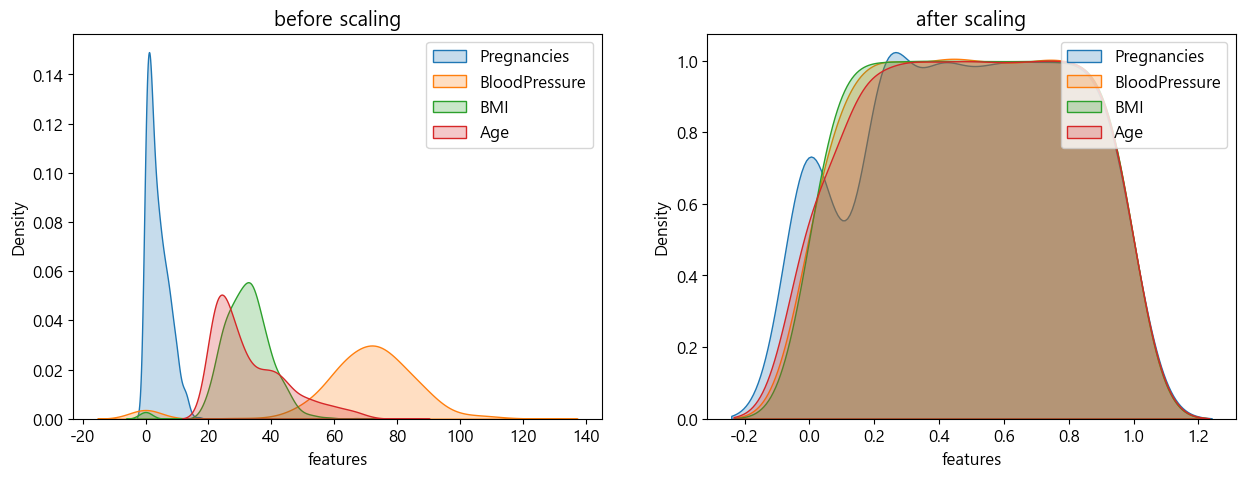

In [39]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(output_distribution= 'uniform', n_quantiles= len(X))
X_qtu = scaler.fit_transform(X)
X_qtu = pd.DataFrame(X_qtu, columns = X.columns)
print(X_qtu.describe())

fig, ax = plt.subplots(1,2,figsize = (15,5))
for col in X.columns:
    sns.kdeplot(X[col], ax = ax[0], shade = True)
    sns.kdeplot(X_qtu[col], ax = ax[1], shade = True)

ax[0].legend(X.columns)
ax[0].set_title('before scaling')
ax[0].set_xlabel('features')

ax[1].legend(X_qtu.columns)
ax[1].set_title('after scaling')
ax[1].set_xlabel('features')
plt.show()

       Pregnancies  BloodPressure         BMI         Age
count   768.000000     768.000000  768.000000  768.000000
mean     -0.518602      -0.137647   -0.034803   -0.270105
std       2.066619       1.426041    1.150110    1.696606
min      -5.199338      -5.199338   -5.199338   -5.199338
25%      -0.729902      -0.742760   -0.675516   -0.659183
50%       0.008170       0.042498   -0.014707   -0.008170
75%       0.667327       0.706638    0.683750    0.712945
max       5.199338       5.199338    5.199338    5.199338


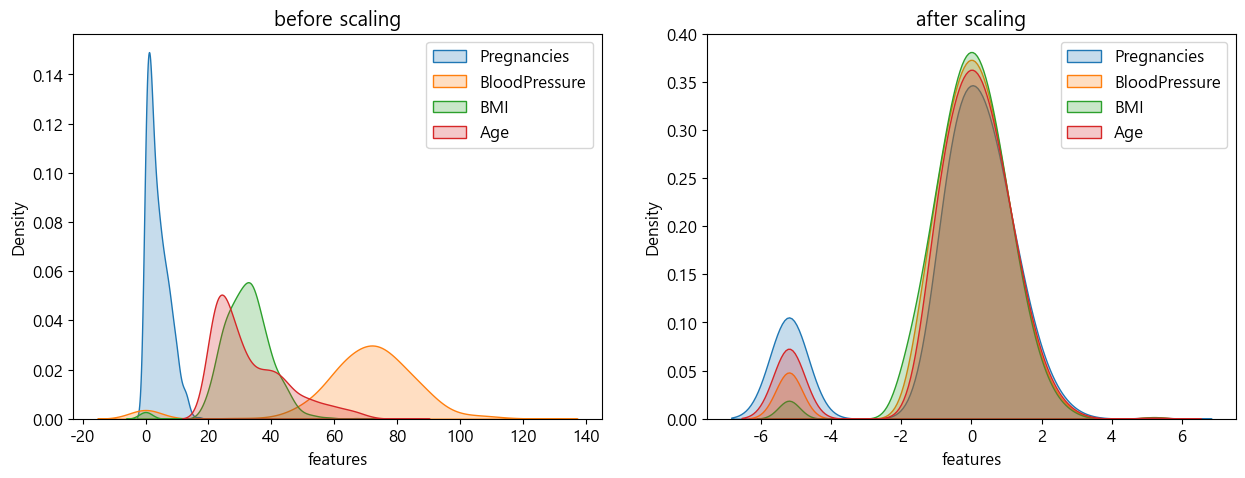

In [40]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(output_distribution= 'normal', n_quantiles= len(X))
X_qtn = scaler.fit_transform(X)
X_qtn = pd.DataFrame(X_qtn, columns = X.columns)
print(X_qtn.describe())

fig, ax = plt.subplots(1,2,figsize = (15,5))
for col in X.columns:
    sns.kdeplot(X[col], ax = ax[0], shade = True)
    sns.kdeplot(X_qtn[col], ax = ax[1], shade = True)

ax[0].legend(X.columns)
ax[0].set_title('before scaling')
ax[0].set_xlabel('features')

ax[1].legend(X_qtn.columns)
ax[1].set_title('after scaling')
ax[1].set_xlabel('features')
plt.show()

Feature scaling 한 데이터로 로지스틱 회귀 분석 및 결과 비교

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

data = [X, X_ss, X_mm, X_rs, X_qtu, X_qtn]
y = diabetes['Outcome']
data_title = ['no scaling', 'StandardScaler', 'MinMaxScaler', 'RobustScaler', 'QuantileUniform', 'QuantileNormal']
scores = pd.DataFrame(index = ['train_acc', 'test_acc', 'f1_score', 'roc_auc_score'], columns = data_title)
coeffs = pd.DataFrame(index = data_title, columns = X.columns)

for df, title in zip(data, data_title):
    X_train, X_test, y_train, y_test = train_test_split(df, y, random_state= 42, test_size = 0.3)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)

    scores.loc['train_acc', title] = lr.score(X_train, y_train)
    scores.loc['test_acc', title] = lr.score(X_test, y_test)
    scores.loc['f1_score', title] = f1_score(y_test, y_pred)
    scores.loc['roc_auc_score', title] = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
    coeffs.loc[title, :] = lr.coef_

scores
# QuantileUniform scaling 의 결과가 가장 높게 나옴

,no scaling,StandardScaler,MinMaxScaler,RobustScaler,QuantileUniform,QuantileNormal
train_acc,0.6946,0.696462,0.698324,0.698324,0.726257,0.705773
test_acc,0.640693,0.645022,0.662338,0.640693,0.65368,0.649351
f1_score,0.411348,0.422535,0.360656,0.411348,0.42029,0.408759
roc_auc_score,0.681829,0.681416,0.679098,0.681581,0.681912,0.67976


In [46]:
coeffs

,Pregnancies,BloodPressure,BMI,Age
no scaling,0.042818,-0.006338,0.118619,0.053567
StandardScaler,0.145749,-0.115418,0.917466,0.618503
MinMaxScaler,0.778215,0.071484,3.90755,2.209255
RobustScaler,0.218859,-0.104343,1.074014,0.881376
QuantileUniform,0.078101,-0.10084,2.391584,2.405077
QuantileNormal,0.022259,-0.036402,0.769551,0.513718


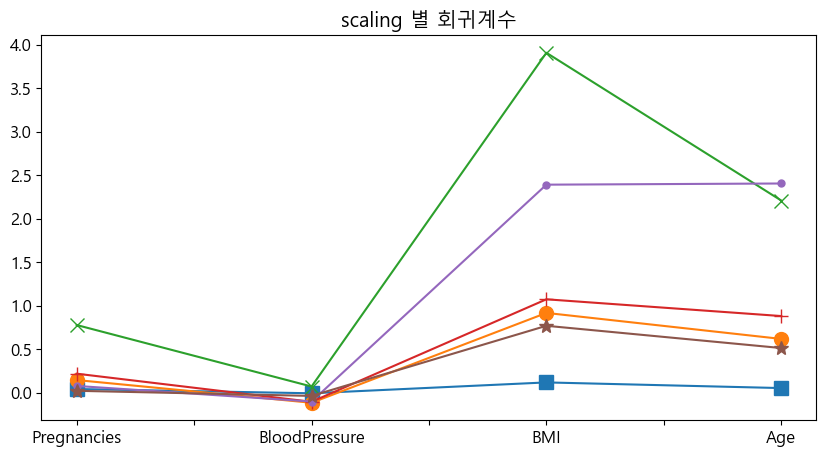

In [51]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10, 5))

ax.set_title('scaling 별 회귀계수')
for i, marker in enumerate(['s', 'o', 'x', '+' ,'.', '*']):
    coeffs.T.iloc[:, i].plot(ax = ax, ms = 10, marker = marker)


로그변환
+ 두꺼운 꼬리 분포에 적용하면 효과적

In [3]:
import pandas as pd
import numpy as np

realestate = pd.read_csv('./data/2-4_BHP.csv')
realestate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [25]:
realestate = realestate.dropna().reset_index(drop = True)
X = realestate[['bath', 'balcony']]
y = realestate[['price']]

realestate.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00


In [19]:
example_y = 39.07

# 상용로그
y_log = np.log10(example_y)
y_log_inv = 10 ** y_log
print('상용로그 :{:.2f} <--> {:.2f}'.format(y_log, y_log_inv))

# 자연로그
y_log2 = np.log(example_y)
y_log2_inv = np.exp(y_log2)
print('자연로그 :{:.2f} <--> {:.2f}'.format(y_log2, y_log2_inv))

# 데이터에 1을 더하고 자연로그(데이터가 0 근처일 때 방지)
y_log3 = np.log1p(example_y)
y_log3_inv = np.expm1(y_log3)
print('자연로그1p :{:.2f} <--> {:.2f}'.format(y_log3, y_log3_inv))

# 데이터의 절댓값에 자연로그 변환 후 데이터의 부호를 붙임
y_log4 = np.sign(example_y) * np.log(np.abs(example_y))
y_log4_inv = np.sign(example_y) * np.exp(np.abs(y_log4))
print('절대값 + 자연로그 + 부호 :{:.2f} <--> {:.2f}'.format(y_log4, y_log4_inv))

상용로그 :1.59 <--> 39.07
자연로그 :3.67 <--> 39.07
자연로그1p :3.69 <--> 39.07
절대값 + 자연로그 + 부호 :3.67 <--> 39.07


거듭제곱 변환
+ 로그변환을 일반화한 것으로 Box-cox 방법과 Yeo-Johnson 방법이 있음

In [32]:
from sklearn.preprocessing import PowerTransformer
PTB = PowerTransformer(method = 'box-cox')
PTY = PowerTransformer(method = 'yeo-johnson')
y_ptb = pd.DataFrame(PTB.fit_transform(y), columns= y.columns)
y_pty = pd.DataFrame(PTY.fit_transform(y), columns= y.columns)

y_ptb_inv = pd.DataFrame(PTB.inverse_transform(y_ptb), columns = y.columns)

print('원본 :', y.head(1).values)
print('box-cox 변환 :', y_ptb.head(1).values)
print('box-cox 되돌리기 :', y_ptb_inv.head(1).values)

원본 : [[39.07]]
box-cox 변환 : [[-1.06667465]]
box-cox 되돌리기 : [[39.07]]


Target scaling 한 데이터로 시각화, 선형 회귀 분석 및 결과 비교

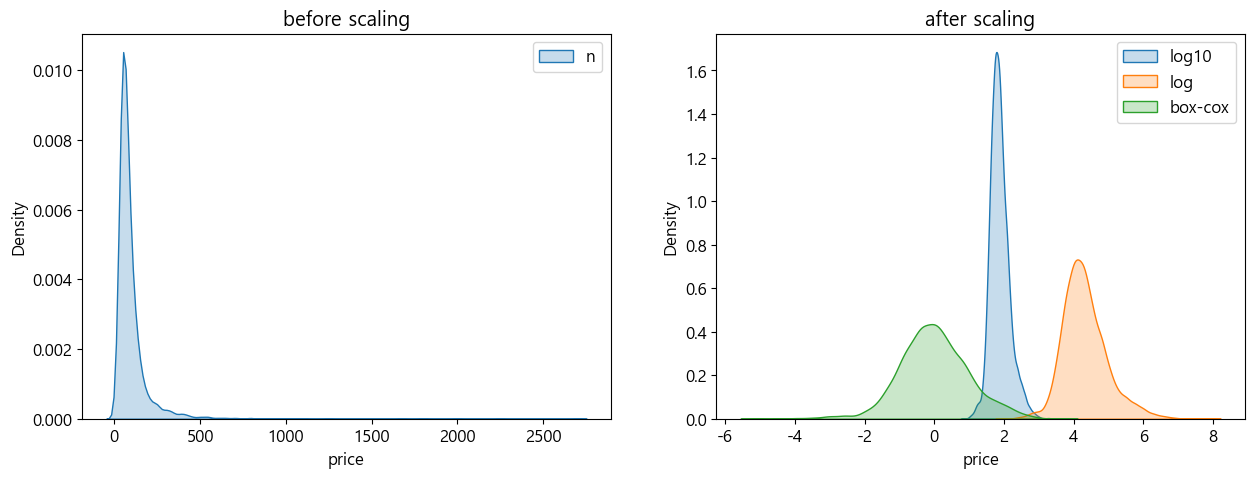

In [46]:
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

noscaling, log10, log, boxcox = y, np.log10(y), np.log(y), y_ptb
data = [noscaling, log10, log, boxcox]
data_title = ['no scaling', 'log10', 'log', 'box-cox']

fig, ax = plt.subplots(1,2,figsize = (15,5))
for i, df in zip(range(len(data)), data):
    if i == 0:
        sns.kdeplot(df['price'], ax = ax[0], shade = True)
        ax[0].legend(data_title[0])
        ax[0].set_title('before scaling')
    else:
        sns.kdeplot(df['price'], ax = ax[1], shade = True)
        ax[1].legend(data_title[1:])
        ax[1].set_title('after scaling')
    
plt.show()

In [54]:
noscaling, log10, log, log1p, sblog, bc, yj = y, np.log10(y), np.log(y), np.log1p(y), np.sign(y)*np.log(np.abs(y)), y_ptb, y_pty

data = [noscaling, log10, log, log1p, sblog, bc, yj]
data_title = ['no scaling', 'log10' ,'log', 'log1p', 'sign+abs+log', 'box-cox', 'yeo-johnson']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
scores = pd.DataFrame(index = ['train r2', 'test r2'], columns = data_title)
scores

for df, title in zip(data, data_title):
    X_train, X_test, y_train, y_test = train_test_split(X, df, random_state=42, test_size=0.3)
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    scores.loc['train r2', title] = lr.score(X_train, y_train)
    scores.loc['test r2', title] = lr.score(X_test, y_test)

scores # 스케일링 한 데이터가 결정계수가 더 높음

,no scaling,log10,log,log1p,sign+abs+log,box-cox,yeo-johnson
train r2,0.347251,0.540738,0.540738,0.541473,0.540738,0.513183,0.513167
test r2,0.371472,0.565088,0.565088,0.565608,0.565088,0.542114,0.542242


In [64]:
print(X.describe())

X_rank = X.rank(ascending= False)
print(X_rank.describe())

              bath      balcony
count  7496.000000  7496.000000
mean      2.458378     1.629936
std       0.881128     0.780127
min       1.000000     0.000000
25%       2.000000     1.000000
50%       2.000000     2.000000
75%       3.000000     2.000000
max       9.000000     3.000000
              bath     balcony
count  7496.000000  7496.00000
mean   3748.500000  3748.50000
std    1926.118911  2010.62683
min       2.000000   503.00000
25%    1754.000000  2562.50000
50%    4927.000000  2562.50000
75%    4927.000000  5607.00000
max    7282.500000  7295.50000


In [86]:
# pd.cut 으로 분할
binned = pd.cut(X['bath'], bins = 4)
freq_df = pd.DataFrame(binned.value_counts().reset_index())
freq_df.columns = ['계급', '빈도']
freq_df = freq_df.sort_values(by = '계급' , ascending= True)

print(freq_df)
print()

bin_edges = [0,2,4,6,float('inf')]

# right = False : 0이상 2미만, 2이상 4미만, 4이상, 6미만, 6이상~
binned2 = pd.cut(X['bath'], bin_edges, right = False)
freq_df2 = pd.DataFrame(binned2.value_counts().reset_index())
freq_df2.columns = ['계급', '빈도']
freq_df2 = freq_df2.sort_values(by = '계급', ascending= True)

print(freq_df2)

             계급    빈도
0  (0.992, 3.0]  6774
1    (3.0, 5.0]   642
2    (5.0, 7.0]    77
3    (7.0, 9.0]     3

           계급    빈도
2  [0.0, 2.0)   428
0  [2.0, 4.0)  6346
1  [4.0, 6.0)   642
3  [6.0, inf)    80


In [92]:
# sklearn.preprocessing.KBinsDiscretizer 로 구간 분할
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins = 3, strategy= 'quantile')
kb.fit(np.array(X['bath']).reshape(-1,1)) # reshape 필요
print('bin edges :', kb.bin_edges_[0]) # 3개의 bin 구간이 생김

kbbin = kb.bin_edges_[0]
bin_edges = [] # 구간 리스트인 bin_edges 를 만듦

for i in range(len(kbbin)):
    if len(kbbin) - 1 != i:
        tup = (int(kbbin[i]), int(kbbin[i+1]))
        bin_edges.append(tup)

kbinned = kb.transform(np.array(X['bath']).reshape(-1, 1))
result = pd.DataFrame(kbinned.toarray(), columns = bin_edges)
result.head(3)

bin edges : [1. 2. 3. 9.]


,"(1, 2)","(2, 3)","(3, 9)"
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0


### 2.4.2 범주형 변수 변환

In [117]:
realestate = pd.read_csv('./data/2-4_BHP.csv').dropna().reset_index(drop = True) # 결측치 삭제 후 인덱스 리셋
print(realestate.info())
realestate.describe(include = 'object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7496 entries, 0 to 7495
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     7496 non-null   object 
 1   availability  7496 non-null   object 
 2   location      7496 non-null   object 
 3   size          7496 non-null   object 
 4   society       7496 non-null   object 
 5   total_sqft    7496 non-null   object 
 6   bath          7496 non-null   float64
 7   balcony       7496 non-null   float64
 8   price         7496 non-null   float64
dtypes: float64(3), object(6)
memory usage: 527.2+ KB
None


,area_type,availability,location,size,society,total_sqft
count,7496,7496,7496,7496,7496,7496
unique,4,74,634,15,2592,1682
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,6017,5709,397,3411,80,172


원핫인코딩

In [107]:
# 원본데이터
print(realestate['area_type'].unique())
print(realestate['area_type'].head(5), '\n')

# 원핫인코딩한 데이터
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
result = ohe.fit_transform(realestate[['area_type']])
result = pd.DataFrame(result.toarray(), columns = ohe.get_feature_names_out())
result.head()

['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
0    Super built-up  Area
1              Plot  Area
2    Super built-up  Area
3    Super built-up  Area
4              Plot  Area
Name: area_type, dtype: object 



,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0


더미코딩

In [112]:
# 더미코딩한 데이터
# result = pd.get_dummies(realestate[['area_type']])
result2 = pd.get_dummies(realestate[['area_type']], drop_first= True)
result2.head(5)

,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,False,False,True
1,False,True,False
2,False,False,True
3,False,False,True
4,False,True,False


숫자로 표현된 범주형 특성 변환

In [118]:
realestate['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [119]:
realestate['area_type'] = realestate['area_type'].map({'Super built-up  Area' : 0, 'Plot  Area' : 1, 'Built-up  Area' : 2, 'Carpet  Area' : 3})
realestate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7496 entries, 0 to 7495
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     7496 non-null   int64  
 1   availability  7496 non-null   object 
 2   location      7496 non-null   object 
 3   size          7496 non-null   object 
 4   society       7496 non-null   object 
 5   total_sqft    7496 non-null   object 
 6   bath          7496 non-null   float64
 7   balcony       7496 non-null   float64
 8   price         7496 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 527.2+ KB


In [120]:
realestate['area_type'].describe()

count    7496.000000
mean        0.365662
std         0.763294
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: area_type, dtype: float64

In [122]:
# 데이터 타입을 category 로 변경 : 수치형 데이터지면 범주형 변수로 해석됨
realestate['area_type'] = realestate['area_type'].astype('category')
realestate['area_type'].describe()

count     7496
unique       4
top          0
freq      6017
Name: area_type, dtype: int64

레이블 인코딩

In [129]:
# 변수 size 의 수준을 확인
print(sorted(realestate['size'].unique()))
realestate['size'].head(5)

['1 BHK', '1 RK', '11 BHK', '2 BHK', '2 Bedroom', '3 BHK', '3 Bedroom', '4 BHK', '4 Bedroom', '5 BHK', '5 Bedroom', '6 BHK', '6 Bedroom', '7 BHK', '9 BHK']


0        2 BHK
1    4 Bedroom
2        3 BHK
3        2 BHK
4    4 Bedroom
Name: size, dtype: object

In [141]:
case1 = realestate['size'].map({'1 BHK' : 0, '1 RK':1, '11 BHK':2, '2 BHK':3, '2 Bedroom':4, '3 BHK':5, '3 Bedroom':6, '4 BHK':7, 
                                '4 Bedroom':8, '5 BHK':9, '5 Bedroom':10, '6 BHK':11, '6 Bedroom':12, '7 BHK':13, '9 BHK':14})

case1.values[:5]

array([3, 8, 5, 3, 8], dtype=int64)

In [142]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
case2 = le.fit_transform(realestate['size'])
print(case2[:5])
print(le.classes_)

[3 8 5 3 8]
['1 BHK' '1 RK' '11 BHK' '2 BHK' '2 Bedroom' '3 BHK' '3 Bedroom' '4 BHK'
 '4 Bedroom' '5 BHK' '5 Bedroom' '6 BHK' '6 Bedroom' '7 BHK' '9 BHK']


특징 해싱
+ 범주의 수준이 많은 변수인 경우 특징 개수를 한정하여 변수 변환을 해줌

빈도 인코딩

In [152]:
fe = realestate[['availability', 'society', 'total_sqft']]

for col in ['availability', 'society', 'total_sqft']:
    freq = fe[col].value_counts()
    fe[col] = fe[col].map(freq)

fe.head()

,availability,society,total_sqft
0,157,5,11
1,5709,11,10
2,5709,22,4
3,5709,1,27
4,5709,6,1


In [157]:
realestate[['availability', 'society', 'total_sqft']].head(3)

,availability,society,total_sqft
0,19-Dec,Coomee,1056
1,Ready To Move,Theanmp,2600
2,Ready To Move,Soiewre,1521


In [158]:
realestate['availability'].value_counts()

availability
Ready To Move    5709
18-Dec            180
18-May            171
19-Dec            157
18-Apr            148
                 ... 
20-Feb              1
15-Jun              1
20-Mar              1
16-Mar              1
14-Jul              1
Name: count, Length: 74, dtype: int64

## 연습문제

1. 데이터의 결측치와 이상치를 확인하고 합리적인 전처리를 진행하라

In [159]:
df = pd.read_csv('./data/practice1_bank.csv')
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,month,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,oct,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,may,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,apr,no


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   month      4521 non-null   object
 10  y          4521 non-null   object
dtypes: int64(2), object(9)
memory usage: 388.6+ KB


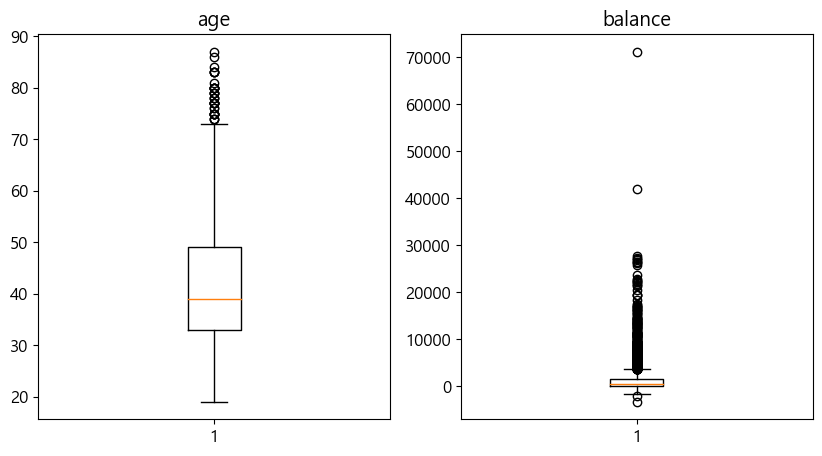

In [168]:
# 수치형 변수 이상치 확인하자
features = ['age', 'balance']

fig, ax = plt.subplots(1,2, figsize = (10, 5))
ax[0].boxplot(df['age'])
ax[0].set_title('age')
ax[1].boxplot(df['balance'])
ax[1].set_title('balance')
plt.show()

# age, balance 모두 이상치가 발견되었으나 age 는 이상치라고 하기에 데이터가 합리적 수준이라고 판단됨
# balance 의 경우는 이상치가 전체 대비 극단적이므로 조정을 적용하기로 결정함

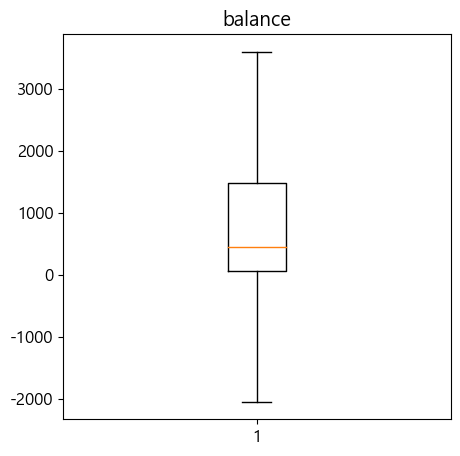

In [175]:
# 이상치 조정 후 시각화
IQR = df['balance'].quantile(0.75) - df['balance'].quantile(0.25)
top = df['balance'].quantile(0.75) + IQR*1.5
bottom = df['balance'].quantile(0.25) - IQR*1.5

df2 = df.copy()
df2['balance'] = df2['balance'].clip(bottom, top)

# fig, ax = plt.subplot()
plt.boxplot(df2['balance'])
plt.title('balance')
plt.show()

2. 범주형 변수를 전처리 하는 방법을 2가지 이상 설명하고, 각 범주형 변수에 대한 적절한 전처리를 진행하세요

In [186]:
# 범주형 변수를 전처리하는 방법은 원핫인코딩, 더미코딩, 레이블 인코딩 등이 있다.
# 더미코딩은 범주형 변수 수준이 n개일 때 n-1 개 가변수를 생성하여 다중공선성을 방지한다.

# 이진변수와 서열척도인 범주형 변수는 레이블인코딩을 하고
# 명목척도인 범주형 변수는 더미코딩을 하기로 한다.

df3 = df2.copy()

features = [x for x in df3.columns if x not in ['age', 'balance']]
print(df3[features].describe(include= 'all'))

# 이진변수 인코딩
for col in ['default', 'housing', 'loan', 'y']:
    df3[col] = df3[col].map({'yes' : 1, 'no' : 0})

# 서열척도 변수 레이블 인코딩
df3['education'] = df3['education'].map({'unknown' : 0,'primary' : 1, 'secondary' : 2, 'tertiary' : 3})

# 명목척도 인코딩
features = ['job', 'marital', 'contact', 'month']
df3 = pd.get_dummies(df3, columns = features, drop_first = True)

df3.head()

               job  marital  education default housing  loan   contact month  \
count         4521     4521       4521    4521    4521  4521      4521  4521   
unique          12        3          4       2       2     2         3    12   
top     management  married  secondary      no     yes    no  cellular   may   
freq           969     2797       2306    4445    2559  3830      2896  1398   

           y  
count   4521  
unique     2  
top       no  
freq    4000  


,age,education,default,balance,housing,loan,y,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,30,1,0,1787.0,0,0,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,33,2,0,3596.5,1,1,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,35,3,0,1350.0,1,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,30,3,0,1476.0,1,1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,59,2,0,0.0,1,0,0,True,False,False,...,False,False,False,False,False,False,True,False,False,False


3. 수치형 변수를 전처리 하는 방법을 2가지 이상 설명하고, 각 수치형 변수에 대한 적절한 전처리를 진행하세요

In [191]:
# 수치형 데이터에서 age, balance 간의 단위 차이가 크다.
# 모델을 학습할 때 변수 간 단위 차이가 크면 학습이 제대로 이뤄지지 않을 수 있다.
# 수치형 변수를 전처리하는 방법에는 minmaxscaling, standardscaling, robustscaling 등이 있다.
# minmaxscaling 은 0~1 사이에 변수가 분포하도록 하고
# standardscaling 은 평균0 표준편차1이 되도록 변환하는 방법이다.
# robustscaling 은 이상치의 영향을 덜 받는 스케일링 방법이다.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df3[['age', 'balance']])
df_scaled = pd.DataFrame(df_scaled, columns = ['age', 'balance'])
df_scaled.head()

,age,balance
0,-1.056270,0.655937
1,-0.772583,2.114953
2,-0.583458,0.303580
3,-1.056270,0.405175
4,1.686036,-0.784937


4. 해당 데이터에 클래스 불균형이 있는지 확인하고 그렇게 생각한 이유를 작성하세요.

In [197]:
df3['y'].value_counts(normalize= True)

# 타겟변수인 y의 클래스 분포를 보았을 때 약 88% : 12% 로 차이가 많이 나므르 클래스 불균형이라고 할 수 있다.

y
0    0.88476
1    0.11524
Name: proportion, dtype: float64

5. 클래스 불균형이 있는 데이터를 처리하는 방법들 중 2가지를 들어 그 방법의 장단점을 서술하고 그 중 하나를 선택하여 전처리를 진행하라

In [202]:
df3

,age,education,default,balance,housing,loan,y,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,30,1,0,1787.0,0,0,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,33,2,0,3596.5,1,1,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,35,3,0,1350.0,1,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,30,3,0,1476.0,1,1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,59,2,0,0.0,1,0,0,True,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,2,0,-333.0,1,0,0,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4517,57,3,1,-2047.5,1,1,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4518,57,2,0,295.0,0,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4519,28,2,0,1137.0,0,0,0,True,False,False,...,False,True,False,False,False,False,False,False,False,False


In [213]:
# 오버샘플링과 언더샘플링이 있는데 이 데이터처럼 데이터 크기가 작은 경우 오버샘플링을 진행한다.
# 오버샘플링 방법으로는 랜덤오버샘플링, SMOTE, KMeans-SMOTE 등이 있다.
# 랜덤오버샘플링은 소수의 클래스를 단순 복제하여 클래스가 불균형하지 않도록 맞추는 것으로 과적합의 위험이 있다.
# KMeans-SMOTE 는 k-means 알고리즘을 사용하여 전체 데이터를 클러스터링하고 적은 클래스에 샘플을 추가하는 방법이다.

from imblearn.over_sampling import KMeansSMOTE, SMOTE

X = df3.drop('y', axis = 1)
y = df3[['y']]

os = SMOTE(random_state= 42)
balX, baly = os.fit_resample(X, y)

baly.value_counts()

y
0    4000
1    4000
Name: count, dtype: int64